In [19]:
### Import necessary libraries
import pandas as pd # Data manipulation and analysis.
import numpy as np # Numerical operations and array handling.
import matplotlib.pyplot as plt # More control, lower-level, basic plotting.
import seaborn as sns # Higher-level, more aesthetically pleasing plots.
from scipy import stats # Statistical functions and tests.

pd.set_option('display.max_columns', None) # Display all columns in DataFrame output.
pd.set_option('display.max_rows', None) # Display all rows in DataFrame output.


In [20]:
# load CSV
df = pd.read_csv('atp_tennis.csv')

In [21]:
# Display the first 5 rows of the DataFrame to understand its structure.
df.head()

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
0,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,Dosedel S.,63,77,-1,-1,-1.0,-1.0,6-4 6-2
1,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Clement A.,Enqvist T.,Enqvist T.,56,5,-1,-1,-1.0,-1.0,3-6 3-6
2,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,Escude N.,40,655,-1,-1,-1.0,-1.0,6-7 7-5 6-3
3,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Knippschild J.,Federer R.,Federer R.,87,65,-1,-1,-1.0,-1.0,1-6 4-6
4,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,Fromberg R.,81,198,-1,-1,-1.0,-1.0,7-6 5-7 6-4


In [22]:
# Returns the number of rows and columns in the DataFrame.
df.shape

(66061, 17)

In [23]:
# Returns information about the DataFrame, including data types and non-null counts.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66061 entries, 0 to 66060
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tournament  66061 non-null  object 
 1   Date        66061 non-null  object 
 2   Series      66061 non-null  object 
 3   Court       66061 non-null  object 
 4   Surface     66061 non-null  object 
 5   Round       66061 non-null  object 
 6   Best of     66061 non-null  int64  
 7   Player_1    66061 non-null  object 
 8   Player_2    66061 non-null  object 
 9   Winner      66061 non-null  object 
 10  Rank_1      66061 non-null  int64  
 11  Rank_2      66061 non-null  int64  
 12  Pts_1       66061 non-null  int64  
 13  Pts_2       66061 non-null  int64  
 14  Odd_1       66061 non-null  float64
 15  Odd_2       66061 non-null  float64
 16  Score       66061 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage: 8.6+ MB


In [24]:
# check dupplications
dup_count = df.duplicated().sum()
print("total count：", dup_count)



total count： 0


In [25]:
# transfer Date Dtype from object to datetime64[ns]
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d", errors="coerce")


In [26]:
# check if there is rank is less than 1 in the data, these are bad data need to be removed.

bad_mask = (df["Rank_1"] < 1) | (df["Rank_2"] < 1)
bad_rows = df.loc[bad_mask]
print("rows that Rank（<1）：", len(bad_rows))

# show some bad examplers
cols_show = [c for c in ["Date","Tournament","Round","Player_1","Rank_1","Player_2","Rank_2"] if c in df.columns]
display(bad_rows[cols_show].head(10))

# delete these bad rows
before = len(df)
df = df.loc[~bad_mask].reset_index(drop=True)
after = len(df)
print(f"delete rows: {before - after} ；After：{df.shape}")


rows that Rank（<1）： 26


,Date,Tournament,Round,Player_1,Rank_1,Player_2,Rank_2
63,2000-01-03,Qatar Open,1st Round,Al-Alawi S.K.,-1,Berasategui A.,60
369,2000-02-14,Kroger St. Jude,1st Round,Jensen L.,-1,Mamiit C.,135
549,2000-02-28,Citrix Tennis Championships,1st Round,Roddick A.,-1,Tieleman L.,104
599,2000-03-06,Colombia Open,1st Round,Gonzalez P.,-1,Etlis G.,137
601,2000-03-06,Colombia Open,1st Round,Hadad M.,-1,Hantschk M.,105
606,2000-03-06,Colombia Open,1st Round,Puerta M.,72,Cortes J.,-1
759,2000-03-23,Ericsson Open,2nd Round,Fish M.,-1,Haas T.,21
1018,2000-05-01,Mallorca Open,1st Round,Bastl G.,71,Garcia M.,-1
1804,2000-07-17,Croatia Open,1st Round,Damm M.,80,Peschek D.,-1
3439,2001-02-26,Dubai Championships,1st Round,Eagle J.,-1,Boutter J.,56


delete rows: 26 ；After：(66035, 17)


In [27]:
# build 2 new dataframes player1 and player 2
# each dataframes has player1/2 names , match date, and the rank at that date.

player1 = pd.DataFrame({
    "player": df["Player_1"],
    "date": df["Date"],
    "rank": df["Rank_1"],
})
player2 = pd.DataFrame({
    "player": df["Player_2"],
    "date": df["Date"],
    "rank": df["Rank_2"],
})

# combine two dataframe into one. 
long = pd.concat([player1, player2], ignore_index=True)
long = long.dropna(subset=["player", "date"]).copy()

# added year colum to the list
long["year"] = long["date"].dt.year.astype(int)

# the rows should be doubled
print("long shape:", long.shape)
pd.concat({'head': long.head(5), 'tail': long.tail(5)})


long shape: (132070, 4)


player       date  rank  year
head 0           Dosedel S. 2000-01-03    63  2000
     1           Clement A. 2000-01-03    56  2000
     2            Escude N. 2000-01-03    40  2000
     3       Knippschild J. 2000-01-03    87  2000
     4          Fromberg R. 2000-01-03    81  2000
tail 132065         Rune H. 2025-08-15     9  2025
     132066      Alcaraz C. 2025-08-15     2  2025
     132067      Shelton B. 2025-08-16     6  2025
     132068       Sinner J. 2025-08-16     1  2025
     132069       Zverev A. 2025-08-16     3  2025

In [ ]:
# convert player column to string, remove the SPACEs form the player names 
long["player"] = long["player"].astype(str).str.strip()


# first year is the year of the player's first match, min value of all years
# last year is the  year of the player's last match, max vaule of all years
# career year is last year - first year +1 
# peak rank is the min value of the rank in all time
first_year = long.groupby("player")["year"].min().rename("first_year")
last_year  = long.groupby("player")["year"].max().rename("last_year")
career_years = (last_year - first_year).rename("career_years") +1  
career_peak_rank = long.groupby("player")["rank"].min().rename("career_peak_rank")

#add these colum to the list
summary_core = (
    pd.concat([first_year, last_year, career_years, career_peak_rank], axis=1)
      .reset_index()  
)

# calculate the player's top rank in each year. 
# the rank of a player in a year may go up and down, only the top rank will be shown in the list for each year.
yearly_best = (
    long.groupby(["player", "year"])["rank"]
        .min()
        .unstack("year")
)

# if there is no rank in the year fill with NaN in the year list form 2000 to 2025
years = list(range(2000, 2026))
for y in years:
    if y not in yearly_best.columns:
        yearly_best[y] = np.nan
yearly_best = yearly_best[years]
yearly_best.columns = [f"rank_{y}" for y in years]
yearly_best = yearly_best.reset_index()

# merge summary_core and yearly_best, using player name as index 
summary = summary_core.merge(yearly_best, on="player", how="left")
summary["initial"] = summary["player"].str.strip().str[0].str.upper()

# re-order the list
summary = summary.sort_values(["initial", "player"]).reset_index(drop=True)
ordered_cols = (
    ["initial", "player", "first_year", "last_year", "career_years", "career_peak_rank"]
    + [f"rank_{y}" for y in years]
)
summary = summary[ordered_cols]
print("summary shape:", summary.shape)

summary.head(5)
# now we have all player's fisrt year, last year, career length, carear peak rank, and rank in each year from 2000 to 2025


summary shape: (1683, 32)


,initial,player,first_year,last_year,career_years,career_peak_rank,rank_2000,rank_2001,rank_2002,rank_2003,rank_2004,rank_2005,rank_2006,rank_2007,rank_2008,rank_2009,rank_2010,rank_2011,rank_2012,rank_2013,rank_2014,rank_2015,rank_2016,rank_2017,rank_2018,rank_2019,rank_2020,rank_2021,rank_2022,rank_2023,rank_2024,rank_2025
0,A,Abdulla M.,2005,2005,1,1349,NaN,NaN,NaN,NaN,NaN,1349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,Abel M.,2002,2004,3,191,NaN,NaN,238.0,191.0,411.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A,Acasuso J.,2001,2011,11,20,NaN,77.0,38.0,40.0,67.0,43.0,20.0,28.0,40.0,35.0,49.0,256.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A,Adaktusson J.,2006,2006,1,265,NaN,NaN,NaN,NaN,NaN,NaN,265.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A,Agaev E.,2002,2002,1,368,NaN,NaN,368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:

# beacuse I want to discover the relation between a player's early career rank and how successful the playr is. 
# so any player played less than 2 years will be removed.
# any player who already has rank in year 2000 need to be removed, since we cannot track his early years record.
# any player has more than 22 years career lengh will be deleted, most players can not play for more than 20 years, these must be wrong data or outlier
# any player who is still play will be deleted, those will be used for prediction in the future

before = len(summary)
mask = (
    (summary["career_years"] >= 2)
    & (summary["rank_2000"].isna())
    & (summary["career_years"] <= 22)
    & ~(summary["rank_2024"].notna() & summary["rank_2025"].notna())
)
filtered = (
    summary.loc[mask]
           .sort_values(["initial", "player"])
           .reset_index(drop=True)
)

before = len(summary)
print(f"kept rows: {len(filtered)} / {before} (deleted rows: {before - len(filtered)})")

deleted = summary.loc[~mask, ["player", "career_years", "rank_2000", "rank_2024", "rank_2025"]]
display(deleted.head(5))
display(deleted.tail(5))



kept rows: 699 / 1683 (deleted rows: 984)


,player,career_years,rank_2000,rank_2024,rank_2025
0,Abdulla M.,1,NaN,NaN,NaN
3,Adaktusson J.,1,NaN,NaN,NaN
4,Agaev E.,1,NaN,NaN,NaN
5,Agamenone F.,1,NaN,NaN,NaN
6,Agassi A.,7,1.0,NaN,NaN


,player,career_years,rank_2000,rank_2024,rank_2025
1672,Zhukayev B.,4,NaN,196.0,218.0
1674,Zib T.,9,100.0,NaN,NaN
1677,Zlatanovic A.,1,NaN,NaN,NaN
1679,Zovko L.,10,341.0,NaN,NaN
1681,Zverev A.,13,NaN,2.0,2.0


In [30]:
# get the rank for the first 3 years in the career 
def get_rank_for_offset(row, offset):
    
    try:
        y = int(row["first_year"]) + offset
    except Exception:
        return np.nan
    col = f"rank_{y}"
    return row[col] if col in row.index else np.nan

filtered["rank_year1"] = filtered.apply(lambda r: get_rank_for_offset(r, 0), axis=1)
filtered["rank_year2"] = filtered.apply(lambda r: get_rank_for_offset(r, 1), axis=1)
filtered["rank_year3"] = filtered.apply(lambda r: get_rank_for_offset(r, 2), axis=1)

# calculate how many time in top 100/50/20/10
rank_cols = [c for c in filtered.columns if c.startswith("rank_") and c[5:].isdigit()]
filtered["top100_count"] = (filtered[rank_cols] <= 100).sum(axis=1)
filtered["top50_count"]  = (filtered[rank_cols] <= 50).sum(axis=1)
filtered["top20_count"]  = (filtered[rank_cols] <= 20).sum(axis=1)
filtered["top10_count"]  = (filtered[rank_cols] <= 10).sum(axis=1)

# 3) reorder the list
core = ["initial", "player", "first_year", "last_year", "career_years", "career_peak_rank"]
stats_cols = ["rank_year1", "rank_year2", "rank_year3", "top100_count", "top50_count", "top20_count", "top10_count"]
year_cols = [c for c in filtered.columns if c.startswith("rank_") and c not in stats_cols]

ordered_cols = core + stats_cols + year_cols
filtered = filtered[ordered_cols]

filtered.head(5)


,initial,player,first_year,last_year,career_years,career_peak_rank,rank_year1,rank_year2,rank_year3,top100_count,top50_count,top20_count,top10_count,rank_2000,rank_2001,rank_2002,rank_2003,rank_2004,rank_2005,rank_2006,rank_2007,rank_2008,rank_2009,rank_2010,rank_2011,rank_2012,rank_2013,rank_2014,rank_2015,rank_2016,rank_2017,rank_2018,rank_2019,rank_2020,rank_2021,rank_2022,rank_2023,rank_2024,rank_2025
0,A,Abel M.,2002,2004,3,191,238.0,191.0,411.0,0,0,0,0,NaN,NaN,238.0,191.0,411.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,Acasuso J.,2001,2011,11,20,77.0,38.0,40.0,10,8,1,0,NaN,77.0,38.0,40.0,67.0,43.0,20.0,28.0,40.0,35.0,49.0,256.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A,Ager J.,2002,2004,3,295,948.0,NaN,295.0,0,0,0,0,NaN,NaN,948.0,NaN,295.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A,Aguilar J.,2006,2013,8,191,397.0,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,397.0,NaN,NaN,NaN,223.0,226.0,NaN,191.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A,Ahouda A.,2016,2018,3,727,834.0,946.0,727.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,834.0,946.0,727.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


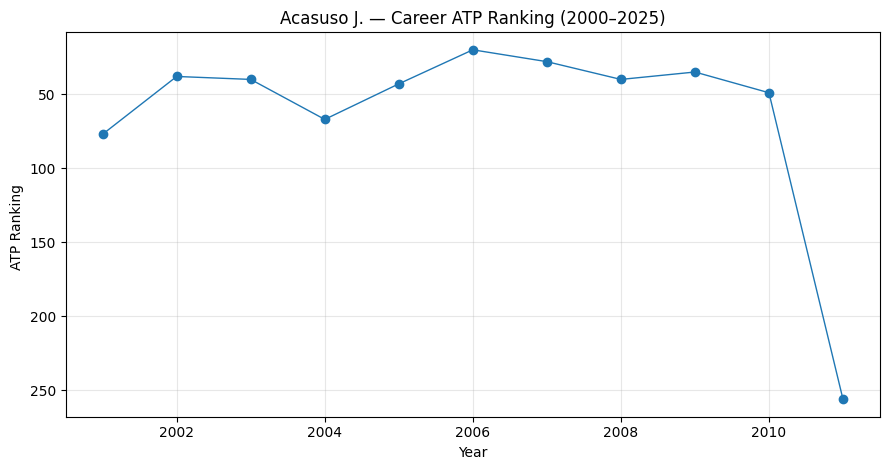

In [46]:
# draw graph to show a player who's top rank is 20, get a rough idea of what's the career peak trend looks like 
# this graph can be used to show any player's career ranking
player = "Acasuso J."         
years  = list(range(2000, 2025 + 1))
cols   = [f"rank_{y}" for y in years]

row = filtered.loc[filtered["player"] == player, ["player"] + cols].iloc[0]

ys, rs = [], []
for y, c in zip(years, cols):
    v = row[c]
    if pd.notna(v):
        ys.append(y)
        rs.append(float(v))

plt.figure(figsize=(9, 4.8))
plt.plot(ys, rs, marker="o", linewidth=1)
ax = plt.gca()
ax.invert_yaxis() 
plt.title(f"{player} — Career ATP Ranking (2000–2025)")
plt.xlabel("Year")
plt.ylabel("ATP Ranking ")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



In [31]:

# Select key numerical features for summary statistics
eda_cols = [
    "rank_year1", "rank_year2", "rank_year3",
    "top100_count", "top50_count", "top20_count", "top10_count",
    "career_peak_rank", "career_years"
]

# Display summary statistics: count, mean, std, min, quartiles, max
display(filtered[eda_cols].describe().T)

,count,mean,std,min,25%,50%,75%,max
rank_year1,699.0,373.987124,284.428681,1.0,184.5,285.0,454.0,2146.0
rank_year2,491.0,241.869654,186.487542,3.0,122.5,191.0,301.0,1461.0
rank_year3,443.0,208.171558,168.186729,2.0,96.5,161.0,269.5,1193.0
top100_count,699.0,2.250358,3.899009,0.0,0.0,0.0,3.0,21.0
top50_count,699.0,1.055794,2.772879,0.0,0.0,0.0,0.0,21.0
top20_count,699.0,0.313305,1.565379,0.0,0.0,0.0,0.0,19.0
top10_count,699.0,0.158798,1.191766,0.0,0.0,0.0,0.0,19.0
career_peak_rank,699.0,169.350501,161.105649,1.0,62.0,135.0,216.5,1370.0
career_years,699.0,7.540773,4.630098,2.0,4.0,7.0,11.0,22.0




1, mean of the rank from year 1 to year 3 are decreasing, most player improved themselves in these years. Although their start line is different. the std for the first year ranking is very large. some  player are aleardy NO 1 in the first year, and some start with No 2000.


2, mean of top 100 50 20 10 are very small, which means getting top100 is already very difficult.


3, mean of peak rank  is 169 , 50% is 135, most player's top rank is around 150


4, most of the player's career can last around 7 years.



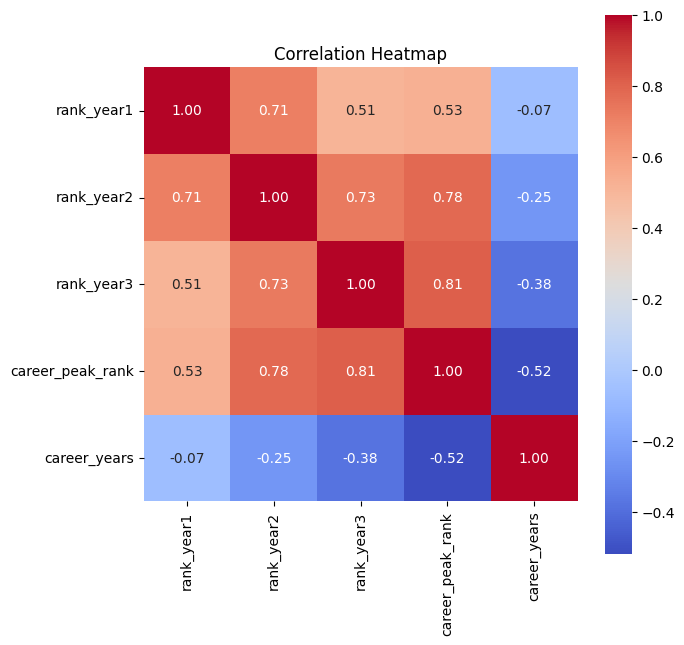

In [47]:
corr_cols = ["rank_year1","rank_year2","rank_year3","career_peak_rank","career_years"]
plt.figure(figsize=(7,7))
sns.heatmap(filtered[corr_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

1, First, Second, Third Years' Rank correlated to the peak rank is 0.53,0.78,0.81. the performance of the player in year 2 and 3 are more related to his final peak rank
the differece between year 2 and year 3 are quite small, which is a good news, so we can predicte the peak rank in the second year.

2, Career Peak Rank vs. Career Years is -0.52: better players usually have a longer career.

3, Year1–3 ranking vs. Career Years is -0.07, -0.25, -0.38, if the player has a good start, there is a big change he can has a long career

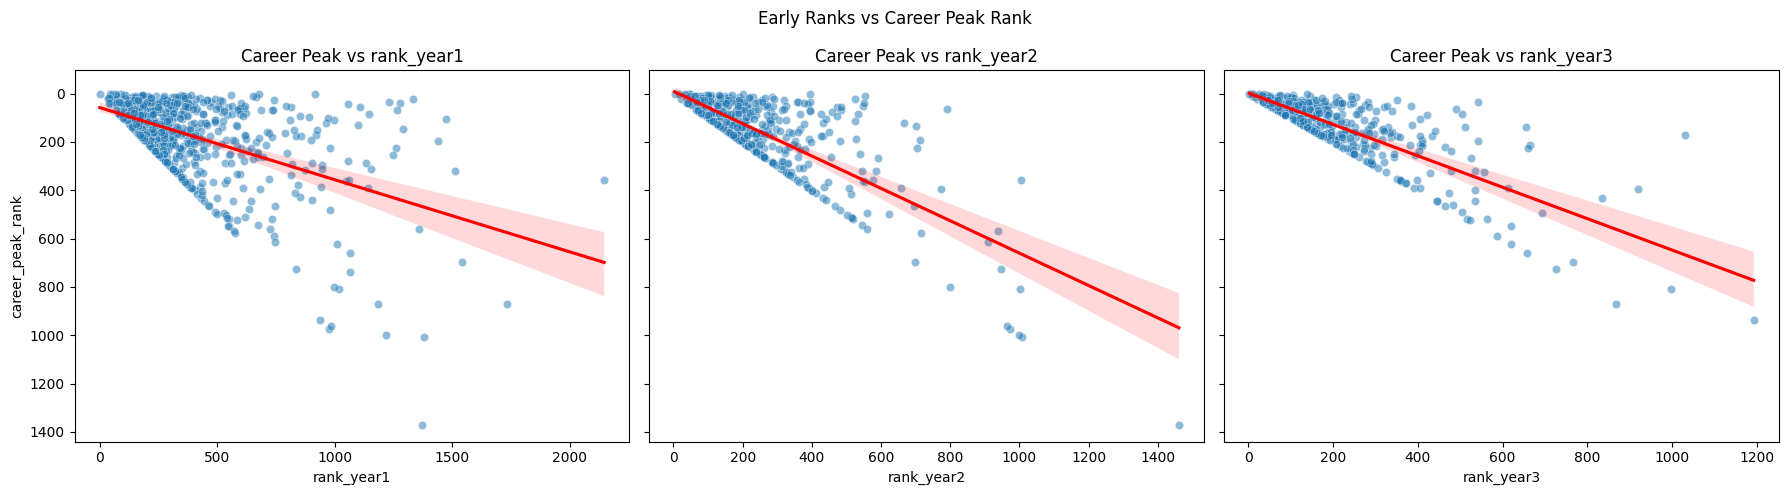

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(18,5), sharey=True)
for i, col in enumerate(["rank_year1","rank_year2","rank_year3"]):
    sns.scatterplot(data=filtered, x=col, y="career_peak_rank", alpha=0.5, ax=axes[i])
    sns.regplot(data=filtered, x=col, y="career_peak_rank", scatter=False, color="red", ax=axes[i])
    axes[i].invert_yaxis()  
    axes[i].set_title(f"Career Peak vs {col}")
plt.suptitle("Early Ranks vs Career Peak Rank"); plt.tight_layout(); plt.show()


1, the regression line is relatively flat, but the scatter is widely spread in the first graph. first year ranking is not strongly related to the career peak rank.

2, in the second graph, the line is steeper, and the points are more concentrated.

3, Although Year 3 also shows a strong relationship, it is only marginally better than Year 2. 



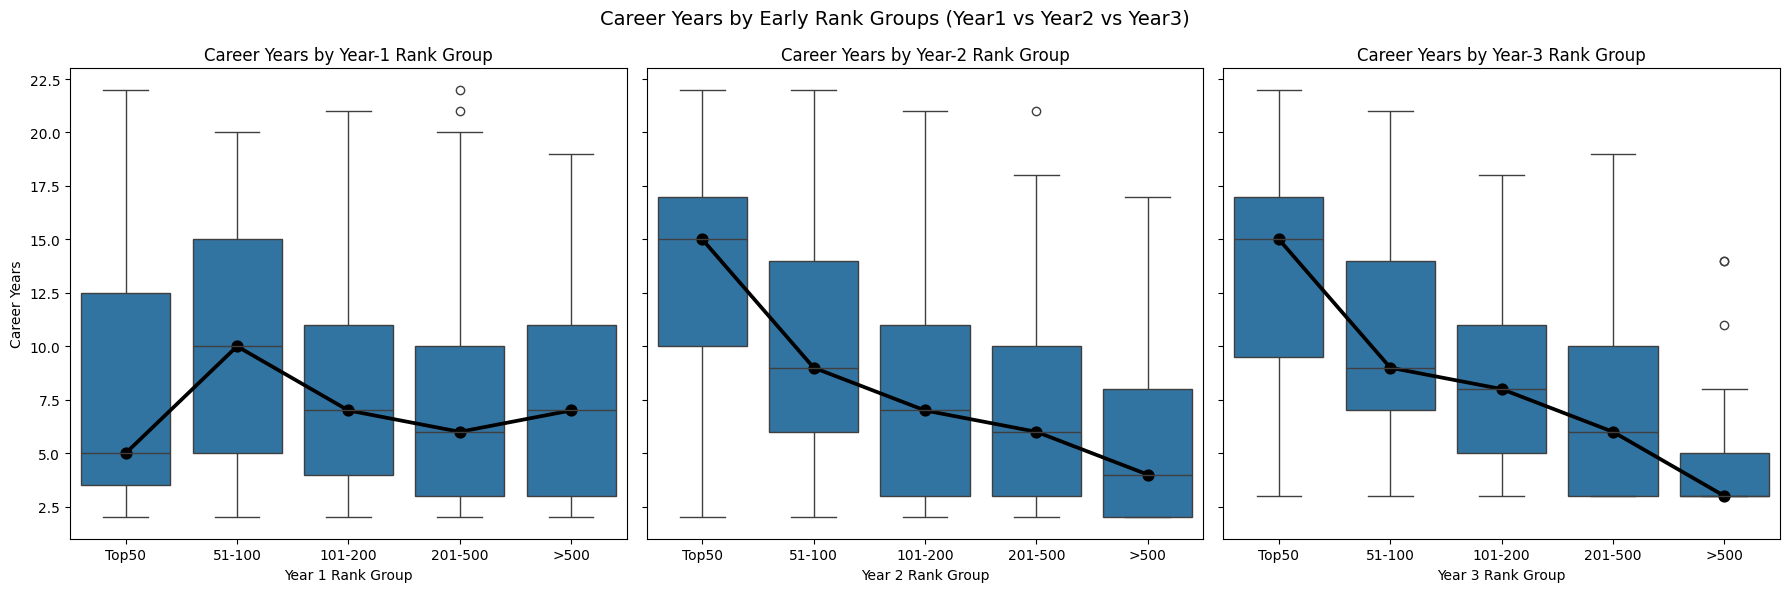

In [50]:



bins = [0, 50, 100, 200, 500, np.inf]
labels = ["Top50","51-100","101-200","201-500",">500"]


tmp = filtered.copy()
tmp["rank1_group"] = pd.cut(tmp["rank_year1"], bins=bins, labels=labels, include_lowest=True)
tmp["rank2_group"] = pd.cut(tmp["rank_year2"], bins=bins, labels=labels, include_lowest=True)
tmp["rank3_group"] = pd.cut(tmp["rank_year3"], bins=bins, labels=labels, include_lowest=True)


fig, axes = plt.subplots(1, 3, figsize=(18,6), sharey=True)

# Year1
sns.boxplot(data=tmp, x="rank1_group", y="career_years", showfliers=True, ax=axes[0])
sns.pointplot(data=tmp, x="rank1_group", y="career_years", estimator=np.median, 
              color="black", errorbar=None, ax=axes[0])
axes[0].set_title("Career Years by Year-1 Rank Group")
axes[0].set_xlabel("Year 1 Rank Group")
axes[0].set_ylabel("Career Years")

# Year2
sns.boxplot(data=tmp, x="rank2_group", y="career_years", showfliers=True, ax=axes[1])
sns.pointplot(data=tmp, x="rank2_group", y="career_years", estimator=np.median, 
              color="black", errorbar=None, ax=axes[1])
axes[1].set_title("Career Years by Year-2 Rank Group")
axes[1].set_xlabel("Year 2 Rank Group")
axes[1].set_ylabel("")

# Year3
sns.boxplot(data=tmp, x="rank3_group", y="career_years", showfliers=True, ax=axes[2])
sns.pointplot(data=tmp, x="rank3_group", y="career_years", estimator=np.median, 
              color="black", errorbar=None, ax=axes[2])
axes[2].set_title("Career Years by Year-3 Rank Group")
axes[2].set_xlabel("Year 3 Rank Group")
axes[2].set_ylabel("")

plt.suptitle("Career Years by Early Rank Groups (Year1 vs Year2 vs Year3)", fontsize=14)
plt.tight_layout()
plt.show()



In the first chart, there is no clear trend, Top 50 only 5 years and Top 100 is 10 years. Indicating that players’ career years is not strongly related to their first-year performance. 

In the second and third charts, the trend is more clear: the better the early performance, the longer the players’ careers tend to be.

Summary:

The first-year performance does not have a particularly strong relationship with a player’s future career top ranking or length.

In contrast, the second-year performance shows a much clearer relation with both career peak and career length. 
 The better a player performs in the second year, the higher the chance of reaching top rankings in the future, and the longer their career tends to be.

The trend in the third year is almost the same as in the second year, so it is sufficient to rely on the second-year results. Predictions can be made one year earlier.

Future projects could therefore focus on using a player’s second-year performance to predict the probability of reaching Top 100, Top 50, or Top 10, or more directly to estimate how many years the player’s career will last and what their rankings might look like each year.

In addition, this dataset does not include players’ age, nationality, or handedness. If these information were available, it would likely improve the accuracy of predictions.

Github: https://github.com/Yifei-Pan-1163295/1163295.git